# Tensorflow 入门基础

# tensorflow 简介

- cntk
微软开发深度学习包，成熟度比tensorflow差

- cafe
当年的老大，没更新；二更也发展不起来了

- torch
扩展好，某些接口不全面，和lua语言亲

- theano
可以的

- keras
知名框架都对其有所支持

- 其他，比如MXNet、DeppLearning4j

### 总结
关注tensorflow、theano、cntk就行

## 怎么学

- 短期任务
直接看例子，扫盲点，套用、

- 近期提升一下
熟悉主干知识（记住，说出来），熟悉例子及其原理

- 一直学下去
一步一步学，努力+时间，积累

## 搭建环境、
- anaconda3、tensorflow、keras也可安装  
    一些numpy、scipy、matplotlib、jupyter...常用的都装上吧
- gpu版本，要安装cuda、cuDNN  
  
    nvidia-smi:查看显卡信息  
    nvcc -V 查看cuda版本


# tensorflow 小探

### 深度学习方式
准备数据、搭建模型、迭代训练、使用模型

下面拟合$y=2x$

- 准备数据

In [1]:
# import tensorflow as tf

# 出现小警告，再导入一次就没了

E:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

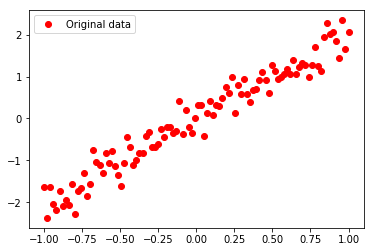

In [34]:
train_X = np.float32(np.linspace(-1,1,100))  # 从-1到1，取100等份
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3  # 加噪声

# 画图
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

- 搭建模型

In [35]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
#模型参数
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

# 前向结构
z = tf.multiply(X, W) + b

In [36]:
#反向优化
cost = tf.reduce_mean(tf.square(Y - z))
learning_rate = 0.01
# GradientDescnetOptimizer 梯度下降算法
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

- 训练模型

In [37]:
# 初始化变量
init = tf.initialize_all_variables()

# 定义参数
training_epochs = 20
display_step = 2

# 打开session
with tf.Session() as sess:
    sess.run(init)
    plotdata = {'batchsize':[],'loss':[]}
    
    #训练
    for epoch in range(training_epochs):
        for x, y in zip (train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        # 显示训练信息
        if epoch%display_step == 0:
            loss = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print('epoch:',epoch+1, 'cost=', loss, 'W=', sess.run(W), 'b=',sess.run(b))
            if not (loss == 'NA'):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)
    print('finished!')
    print("cost=",sess.run(cost,feed_dict={X:train_X, Y:train_Y}),'W=',sess.run(W),'b=',sess.run(b))

epoch: 1 cost= 1.2890445 W= [0.33150923] b= [0.490304]
epoch: 3 cost= 0.18006721 W= [1.5493684] b= [0.16434601]
epoch: 5 cost= 0.08516287 W= [1.8796504] b= [0.03998125]
epoch: 7 cost= 0.077700645 W= [1.9653102] b= [0.0071498]
epoch: 9 cost= 0.07693377 W= [1.9874628] b= [-0.00135049]
epoch: 11 cost= 0.07681329 W= [1.993191] b= [-0.00354869]
epoch: 13 cost= 0.07678734 W= [1.9946727] b= [-0.00411714]
epoch: 15 cost= 0.07678097 W= [1.9950559] b= [-0.0042643]
epoch: 17 cost= 0.07677935 W= [1.995155] b= [-0.0043023]
epoch: 19 cost= 0.076778926 W= [1.9951805] b= [-0.0043121]
finished!
cost= 0.07677886 W= [1.9951848] b= [-0.00431372]
